# Dragon Real Estate price predictor:

In [1]:
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [2]:
housing = pd.read_csv("boston.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

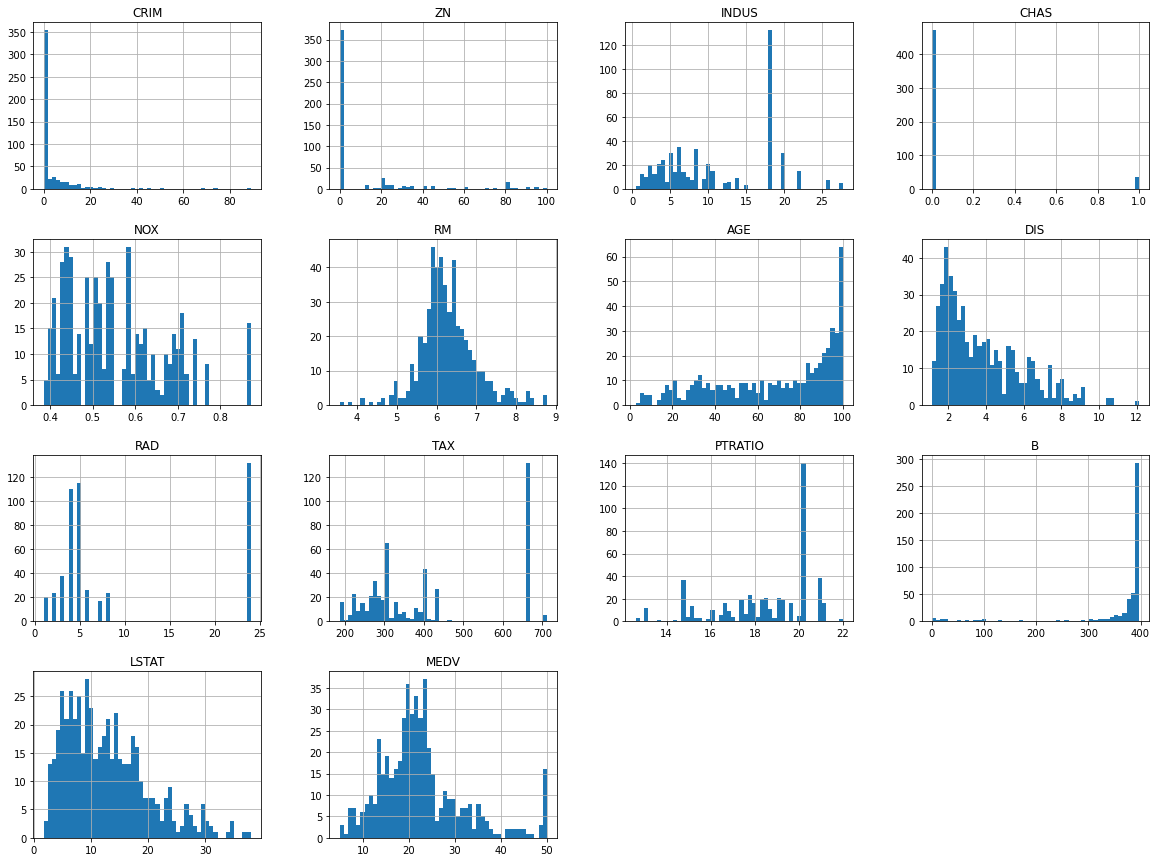

In [7]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

# train_test_spliting:

In [8]:
# for learning perpose:-------> 
# most imp:--->

def train_test_split(data, test_ratio):
    np.random.seed(45) # this helps to pick the random values at one time only and that values are same till end
    shuffled = np.random.permutation(len(data)) # suffled the indeces of the data 
    test_set_size = int(len(data)*test_ratio)   # creating the test set
    test_indices = shuffled[:test_set_size]     # selecting the test_set_size data from main suffled data
    trian_indices = shuffled[test_set_size:]    # selecting the train data from the suffled data
    return data.iloc[trian_indices], data.iloc[test_indices] #return them both seperated data
    

In [9]:
# train_set, test_set = train_test_split(housing, 0.2)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train_set:{len(train_set)}\nRows in test_set:{len(test_set)}")

Rows in train_set:404
Rows in test_set:102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    stra_train_set = housing.loc[train_index]
    stra_test_set = housing.loc[test_index]

In [13]:
stra_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [14]:
stra_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [15]:
stra_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
stra_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
95/7

13.571428571428571

In [18]:
376/28

13.428571428571429

In [19]:
# here we can see that the CHAS is devided in to the test and train set equaly

In [20]:
housing = stra_train_set.copy()

# looking for correlation:

In [21]:
cor_matrix = housing.corr()
cor_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

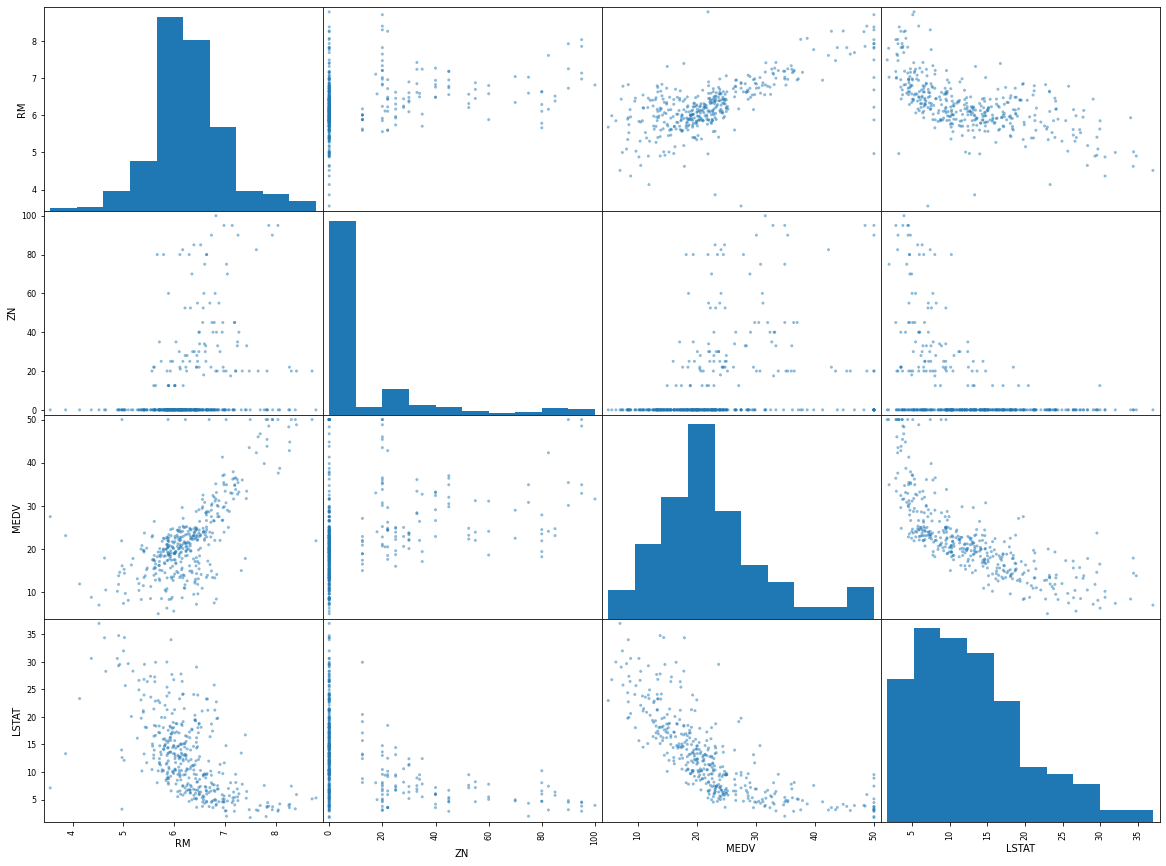

In [22]:
from pandas.plotting import scatter_matrix
atributes=['RM', 'ZN', 'MEDV', 'LSTAT']
scatter_matrix(housing[atributes], figsize = (20, 15))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

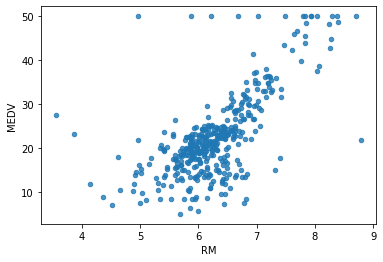

In [23]:
housing.plot(kind = 'scatter', x ='RM', y = 'MEDV', alpha = 0.8)

# Atributes combinations:

In [24]:
housing['TAXRM'] = housing["TAX"]/housing["RM"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
cor_matrix = housing.corr()
cor_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

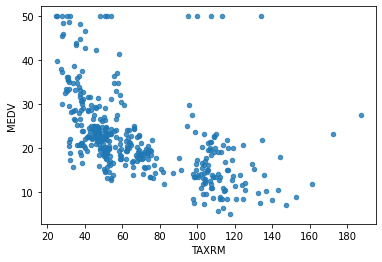

In [26]:
housing.plot(kind = 'scatter', x ='TAXRM', y = 'MEDV', alpha = 0.8)

In [27]:
housing = stra_train_set.drop("MEDV", axis = 1)
housing_labels = stra_train_set["MEDV"].copy()

# Missing Atributes

In [28]:
a = housing.dropna(subset = ['RM']) # optionn1
print(a.shape)

(399, 13)


In [29]:
b=housing.drop("RM", axis = 1)  # option 2
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   AGE      404 non-null    float64
 6   DIS      404 non-null    float64
 7   RAD      404 non-null    int64  
 8   TAX      404 non-null    int64  
 9   PTRATIO  404 non-null    float64
 10  B        404 non-null    float64
 11  LSTAT    404 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 41.0 KB


In [30]:
# here the original dataset will not chnge in the model untill we dont use the implace=True

In [31]:
median = housing["RM"].median()  # comput median for option 3

In [32]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 13)

before we sarted filling missing attributes:---

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [36]:
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x, columns=housing.columns)
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# SKLEARN_DISIGN:

# Creating the pipleines

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")),
                        ('std_scaler', StandardScaler())
                       ])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting a desired modle for Dragon Real Estetes:

In [55]:
# model = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# # from sklearn.tree import DecisionTreeRegressor
# # model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [56]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [57]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.219, 24.846, 16.668, 23.167, 23.555])

In [58]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model:

In [59]:
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [60]:
rmse

1.151572930971605

# using better evaluation techniques - cross validation:

In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)


In [62]:
rmse_scores = np.sqrt(-score)

In [63]:
rmse_scores

array([2.75456786, 2.77959083, 4.51063518, 2.58846592, 3.50707573,
       2.60560561, 4.68290882, 3.37659376, 3.26114645, 3.37900739])

In [64]:
def print_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [65]:
print_scores(rmse_scores)

scores:  [2.75456786 2.77959083 4.51063518 2.58846592 3.50707573 2.60560561
 4.68290882 3.37659376 3.26114645 3.37900739]
mean:  3.34455975521526
Standard Deviation:  0.7050889016870453


## saving the model

In [66]:
from joblib import dump, load
dump(model, 'dragon.joblib')

['dragon.joblib']

## testing the model on test data

In [72]:
x_test = stra_test_set.drop("MEDV", axis = 1)
y_test = stra_test_set["MEDV"].copy()

In [73]:
x_test_prepared = my_pipeline.transform(x_test)


In [78]:
final_predictions = model.predict(x_test_prepared)


In [75]:
final_mse = mean_squared_error(y_test, final_predictions)


In [76]:
final_rmse = np.sqrt(final_mse)

In [77]:
final_rmse

2.90832822068206

In [82]:
print(final_predictions, "\n\n",list(y_test))

[24.847 11.422 25.033 21.874 18.75  15.019 20.129 14.686 32.436 40.424
 19.331 11.337 23.918 28.064 19.572 11.016 32.21  14.019 23.552 18.924
 19.758 17.617 16.73  21.873 18.322 32.049 16.269 33.687  8.574 33.578
 24.126 21.419 23.063 10.811 21.296 11.356 42.104 24.796 23.237 41.952
 24.595 28.957 20.257 20.869 18.964 33.645 44.291 20.43  20.261 21.004
 21.029 14.354 21.221 15.006 24.9   33.394 41.436 29.011 19.728 20.732
 47.072  9.451 19.001 25.699 14.912 33.208 19.783 17.825 19.442 35.058
 26.701 22.666 21.493 22.357 34.663 13.127 15.74  20.114 20.877 21.341
 22.525 20.936 14.435 22.531 20.976 20.945 14.552 21.286 21.377 23.445
 18.438 26.751  7.198 26.881 19.626 29.387 19.515 31.252 14.651 26.798
 21.438 20.521] 

 [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 3

In [84]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using the model:

In [86]:
from joblib import dump, load
model = load('dragon.joblib')
import numpy as np


features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, 6.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, 7.86091034]])
model_predictio = model.predict(features)
print(model_predictio)

[17.231]
